**BÀI 1**

In [ ]:
link='https://www.kaggle.com/datasets/camnugent/california-housing-prices'

In [ ]:
!pip install wget

In [ ]:
import wget
wget.download(link)

'california-housing-prices'

In [ ]:
import pandas as pd
data=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
data=pd.DataFrame(data)

In [ ]:
datalb=data["median_house_value"]
data = data.drop(["median_house_value"], axis='columns')

In [ ]:
import numpy as np
data=np.array(data)

In [ ]:
data_b = np.c_[np.ones((17000, 1)), data]

In [ ]:
theta_best = np.linalg.inv(data_b.T.dot(data_b)).dot(data_b.T).dot(datalb)

In [ ]:
theta_best

array([-3.62060089e+06, -4.31396373e+04, -4.29256731e+04,  1.15069493e+03,
       -8.37825121e+00,  1.17648543e+02, -3.84887721e+01,  4.54360026e+01,
        4.05070684e+04])

In [ ]:
data_test=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
import numpy as np
data_test.replace([np.inf, -np.inf], np.nan, inplace=True)
data_test.dropna(inplace=True)

In [ ]:
data_test=pd.DataFrame(data_test)

In [ ]:
datalb_test=data_test["median_house_value"]
data_test = data_test.drop(["median_house_value"], axis='columns')

In [ ]:
data_test=np.array(data_test)

In [ ]:
data_test.shape


(3000, 8)

In [ ]:
data_test_b=np.c_[np.ones((3000, 1)), data_test]

In [ ]:
y_predict=data_test_b.dot(theta_best)

In [ ]:
datalb_test[0]

344700.0

In [ ]:
y_predict[0]

352812.3111236526

# **BÀI 2**

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/predict+students+dropout+and+academic+success.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/sample_data")

In [ ]:
import pandas as pd
data2=pd.read_csv("/content/sample_data/data.csv")

In [ ]:
data2=pd.DataFrame(data2)

In [ ]:
data=[]
for i in data2.values:
  for a in i:
    data.append(a.split(';'))


In [ ]:
data=pd.DataFrame(data)

In [ ]:
for i in range (len(data)):
  a=data[36][i]
  if a=="Graduate":
    data[36][i]=0
  else:
    data[36][i]=1


In [ ]:
datalb=[]
for i in range (len(data)):
  a=data[36][i]
  datalb.append(a)

In [ ]:
datalb=pd.DataFrame(datalb)

In [ ]:
data = data.drop(36, axis=1)

In [ ]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [ ]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.T, (y_pred - y))
    return cost , gradient

In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)

    return theta, costs

In [ ]:
data=pd.DataFrame(data,dtype=float)

In [ ]:
import numpy as np

In [ ]:
mean_scores = np.mean(data.values, axis=0)
std_scores = np.std(data.values, axis=0)
scores = (data.values - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = datalb.values.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)


In [ ]:
theta, costs = gradient_descent(X, y, theta_init, 0.2, 500)

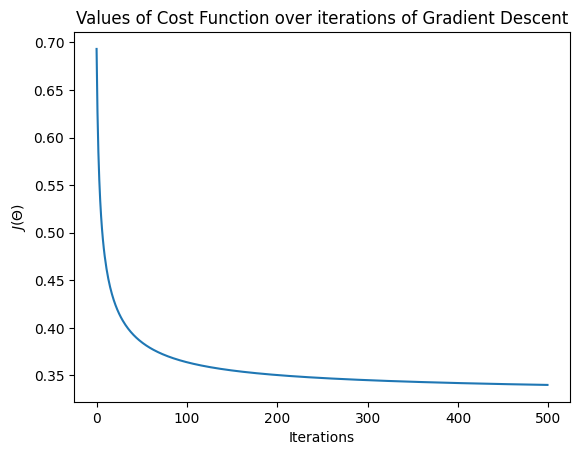

In [ ]:
from matplotlib import pyplot as plt
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

In [ ]:
def predict(theta, x):
    results = np.dot(x,theta)
    return results>0

In [ ]:
p = predict(theta, X)
p=pd.DataFrame(p)
p=p.replace([True],1)
p=p.replace([False],0)

In [ ]:
p=np.array(p)
datalbi=np.array(datalb.values)

In [ ]:
c= np.sum(p==datalbi)

In [ ]:
print("Training Accuracy:", str((c/data.shape[0])*100),"%")

Training Accuracy: 84.5614828209765 %


**BÀI 3**

In [ ]:
import pandas as pd
data3=pd.read_csv("/content/sample_data/data.csv")

In [ ]:
data3=pd.DataFrame(data3)

In [ ]:
data=[]
for i in data3.values:
  for a in i:
    data.append(a.split(';'))


In [ ]:
data=pd.DataFrame(data)

In [ ]:
for i in range (len(data)):
  a=data[36][i]
  if a=="Graduate":
    data[36][i]=0
  elif a=="Dropout":
    data[36][i]=1
  else:
    data[36][i]=2

In [ ]:
datalb=[]
for i in range (len(data)):
  a=data[36][i]
  datalb.append(a)

In [ ]:
datalb=pd.DataFrame(datalb)

In [ ]:
data = data.drop(36, axis=1)

In [ ]:
datalb=np.array(datalb)

In [ ]:
N = data.shape[0]
d = data.shape[1]
C = 3

In [ ]:
y = np.random.randint(0, 3, (N,))

In [ ]:
for i in range(0,len(datalb)):
  y[i]=datalb[0][i]

In [ ]:
from scipy import sparse
def convert_labels(y, C = C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [ ]:
Y = convert_labels(y, C)

In [ ]:
m=data.shape[0]

In [ ]:
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return np.dot(X.T,E)/m


In [ ]:
def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [ ]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [ ]:
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

**BÀI 4**

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
data=pd.DataFrame(data)

In [ ]:
datalb=data["median_house_value"]
data = data.drop(["median_house_value"], axis='columns')

In [ ]:
X = np.array(data)
y = np.array(datalb)

In [ ]:
X.shape

(17000, 8)

In [ ]:
y.shape

(17000,)

In [ ]:
test=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
test=pd.DataFrame(test)

In [ ]:
testlb=test["median_house_value"]
test = test.drop(["median_house_value"], axis='columns')

In [ ]:
X_test = np.array(test)
y_test = np.array(testlb)

In [ ]:
regr = LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

***Logistic Regression***

In [ ]:
data3=pd.read_csv("/content/sample_data/data.csv")

In [320]:
data3=pd.DataFrame(data3)
data=[]
for i in data3.values:
  for a in i:
    data.append(a.split(';'))
data=pd.DataFrame(data)
for i in range (len(data)):
  a=data[36][i]
  if a=="Graduate":
    data[36][i]=0
  else:
    data[36][i]=1
datalb=[]
for i in range (len(data)):
  a=data[36][i]
  datalb.append(a)
data = data.drop(36, axis=1)
datalb=np.array(datalb)
data=np.array(data.values)

In [321]:
X_train, X_test, y_train, y_test = train_test_split(data, datalb, test_size=0.2)

In [323]:
 from sklearn.linear_model import LogisticRegression
 log_reg = LogisticRegression()
 log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [327]:
y_pre = log_reg.predict(X_test)

In [328]:
from sklearn.metrics import accuracy_score
print('Training size = %d, accuracy = %.2f%%' % \
      (X_train.shape[0],accuracy_score(y_test, y_pre)*100))

Training size = 3539, accuracy = 79.89%


**Softmax Regression**

In [329]:
data3=pd.DataFrame(data3)
data=[]
for i in data3.values:
  for a in i:
    data.append(a.split(';'))
data=pd.DataFrame(data)
for i in range (len(data)):
  a=data[36][i]
  if a=="Graduate":
    data[36][i]=0
  elif a=="Dropout":
    data[36][i]=1
  else:
    data[36][i]=2
datalb=[]
for i in range (len(data)):
  a=data[36][i]
  datalb.append(a)
data = data.drop(36, axis=1)
datalb=np.array(datalb)
data=np.array(data.values)

In [330]:
X_train, X_test, y_train, y_test = train_test_split(data, datalb, test_size=0.2)

In [331]:
 softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=3)
 softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3, multi_class='multinomial')

In [332]:
y_pre = softmax_reg.predict(X_test)

In [333]:
from sklearn.metrics import accuracy_score
print('Training size = %d, accuracy = %.2f%%' % \
      (X_train.shape[0],accuracy_score(y_test, y_pre)*100))

Training size = 3539, accuracy = 68.59%
